# W7 Lab Assignment


In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
import random
sns.set_style('white')

%matplotlib inline

# Cumulative histogram and CDF

How can we plot a cumulative histogram? 

In [2]:
# TODO: Load IMDB data into movie_df using pandas
movie_df = pd.read_csv('imdb.csv', delimiter='\t')
movie_df.head()

,Title,Year,Rating,Votes
0,!Next?,1994,5.4,5
1,#1 Single,2006,6.1,61
2,#7DaysLater,2013,7.1,14
3,#Bikerlive,2014,6.8,11
4,#ByMySide,2012,5.5,13


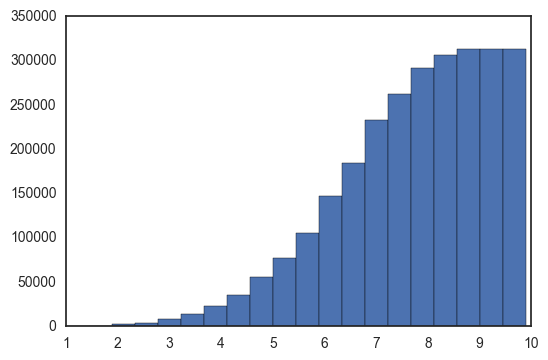

In [3]:
# TODO: draw a cumulative histogram of movie ratings with 20 bins. Hint: use plt.hist()
n, bins, patches = plt.hist(movie_df['Rating'], bins = 20,  cumulative=True)

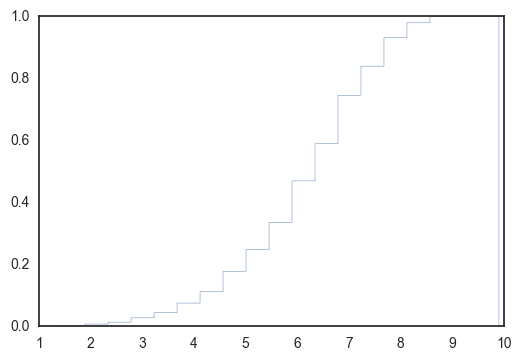

In [4]:
# TODO: same histogram, but with normalization 
n, bins, patches = plt.hist(movie_df['Rating'], bins = 20,normed=1, histtype='step', cumulative=True)

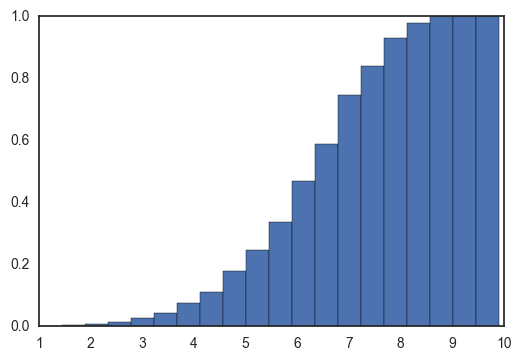

In [5]:
# TODO: same histogram, but with normalization 
n, bins, patches = plt.hist(movie_df['Rating'], bins = 20,normed=1,  cumulative=True)

Does it reach 1.0? Why should it become 1.0 at the right end? Also you can do the plot with pandas. 

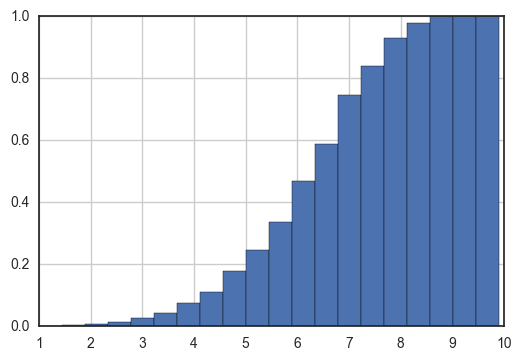

In [6]:
# TODO: same plot, but call directly from dataframe movie_df
movie_df['Rating'].hist( bins = 20,normed=1,  cumulative='True')

## CDF

Let's make it CDF rather than cumulative histogram. You can sort a Series with `order` function. You can use [`np.linspace`](http://docs.scipy.org/doc/numpy/reference/generated/numpy.linspace.html) to generate a list of evenly spaced value. 

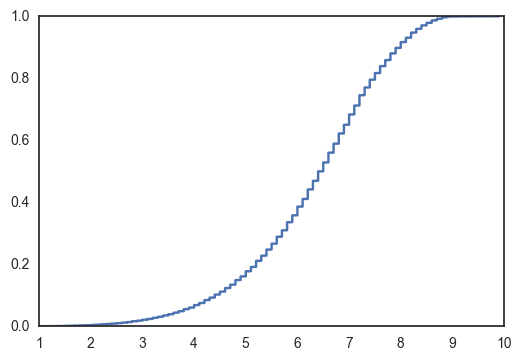

In [7]:
# TODO: plot CDF (not cumulative histogram) of movie ratings. 
ratings = movie_df['Rating'].sort_values()
cum_dist = np.linspace( 1/len(ratings), 1, num=len(ratings))
plt.plot(ratings,cum_dist)

The main advantange of CDF is that we can directly observe percentiles from the plot. Given the number of movies we have, can you estimate the following statistics by observing the plot? Compare your estimation to the precise results calculated from movie_df.

- The numer of movies with rating <= 7
- The median rating of movies
- The rating which 90% of movies are under or equal to


In [8]:
#TODO: provide your estimations.
#1. 0.65 * len(ratings) = 203457.15.
#2. 6.5.
#3. 8.2.

In [9]:
#TODO: calculate the statistics from movie_df.
seven = movie_df['Rating'][movie_df['Rating'] <= 7].values
print(len(seven))
print(np.median(movie_df['Rating']))
print(np.percentile(movie_df['Rating'], [90])[0])

213807
6.5
8.0


# Bootstrap Resampling

Let's imagine that we only have a sample of the IMDB data, say 50 movies. How much can we infer about the original data from this small sample? This is a question that we encounter very often in statistical analysis.

In such situations, we can seek help from the bootstraping method. This is a family of statistical methods that relies on random sampling with replacement. Different to the traditional methods, it does not assume that our data follows a particular distribution, and so is very flexible to use.

In [10]:
#create a random sample from the movie table.
movie_df_sample = movie_df.sample(50)

In [11]:
len(movie_df_sample)

50

Now we have a sample with size = 50. We can compute, for example, the mean of movie ratings in this sample:

In [12]:
print('Mean of sample: ', movie_df_sample.Rating.mean())

Mean of sample:  6.111999999999999


But we only have one statistic. How can we know if this correctly represents the mean of the actual data? We need to compute a confidence interval. This is when we can use bootstrapping.

First, Let's create a function that does the resampling with replacement. It should create a list of the same length as the sample(50 in this case), in which each element is taken randomly from the sample. In this way, some elements may appear more than once, and some none. Then we calculate the mean value of this list.  

In [13]:
def bootstrap_resample(rating_list):
    resampled_list = []
    #todo: write the function that returns the mean of resampled list.
    for i in range(50):
        resampled_list.append(random.choice(rating_list))
    return np.mean(resampled_list)    

We don't usually just do this once: the typical minimal resample number is 1000. We can create a new list to keep this 1000 mean values.

In [14]:
sampled_means = []

In [15]:
#todo: call the function 1000 times and populate the list with its returned values.
for i in range(1000):
    mean = bootstrap_resample(movie_df_sample['Rating'].values)
    sampled_means.append(mean)


Now we can compute the confidence interval. Say we want the 90% confidence, then we only need to pick out the .95 and .05 critical values.

In [16]:
print(1000*0.05, 1000*0.95)

50.0 950.0


That is, we need to pick the 50th and 950th largest values from the list. We can name it x_a and x_b.

In [17]:
#todo: sort the list by ascending and pick out the 50th and 950th value. 
sampled_means.sort()
x_a = sampled_means[49]
x_b = sampled_means[949]
print (x_a,x_b)

5.768 6.462


Let x be the mean value of the sample, we have:

In [18]:
x = movie_df_sample.Rating.mean()

The confidence interval will then be: `[x - (x - x_a), x + (x_b - x)]`.

In [19]:
#todo: calculate the confidence interval. 
#Does the mean of the original data fall within this interval? Show your statistics.
print([x - (x - x_a), x + (x_b - x)])

[5.7680000000000007, 6.4619999999999997]


In [20]:
np.mean(movie_df['Rating'])

6.296195341377723